In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## 1. Продажи магазина растут или падают?

In [2]:
df = pd.read_csv('orders.csv')
df.head()

,id,order_date,ship_date,ship_mode,customer_id,sales,y
0,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,377.970,NaN
1,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,699.192,NaN
2,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,91.056,NaN
3,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,3.928,NaN
4,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,21.376,NaN


In [3]:
#сгруппируем по месяцам и получим количество продаж

df['YearMonth'] = pd.to_datetime(df['order_date']).map(lambda dt: dt.replace(day=1))

res = df['YearMonth'].value_counts()
res.head(10)

#больше всего продаж было в ноябре 2017 г. 

2017-11-01    145
2016-11-01    141
2017-09-01    138
2015-09-01    121
2017-12-01    120
2014-11-01    110
2016-12-01    110
2014-12-01    104
2017-10-01    104
2016-09-01    102
Name: YearMonth, dtype: int64

<AxesSubplot:>

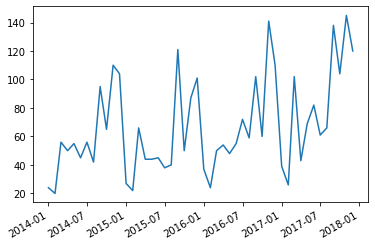

In [4]:
res.plot()

#### Количество продаж растёт.

In [5]:
results = df.groupby('YearMonth').agg({'sales': ['min', 'max', 'sum']})
results['sales']['sum'].sort_values(ascending = False).head(10)

#в ноябре 2017 была максимальная выручка. Топовые месяца -- сентябрь-декабрь.

YearMonth
2017-11-01    73879.2510
2016-12-01    70151.5060
2016-11-01    62495.6318
2017-09-01    59094.5560
2015-09-01    57526.3620
2014-09-01    54511.9518
2015-12-01    53490.9442
2017-10-01    52654.0642
2017-03-01    51812.9398
2014-11-01    49075.6517
Name: sum, dtype: float64

In [6]:
results.reset_index().sort_values('YearMonth', ascending = False).head(10)

YearMonth  sales                       
                 min        max         sum
47 2017-12-01  1.188   2888.518  39678.3508
46 2017-11-01  1.248  10499.970  73879.2510
45 2017-10-01  5.248  13716.458  52654.0642
44 2017-09-01  1.744   7359.918  59094.5560
43 2017-08-01  2.296   4590.344  47296.6440
42 2017-07-01  1.080   2610.730  25601.4320
41 2017-06-01  1.624   4472.320  34127.4347
40 2017-05-01  2.313   3740.510  29814.4038
39 2017-04-01  4.890   5282.648  17663.7795
38 2017-03-01  0.556  14052.480  51812.9398

<AxesSubplot:xlabel='YearMonth'>

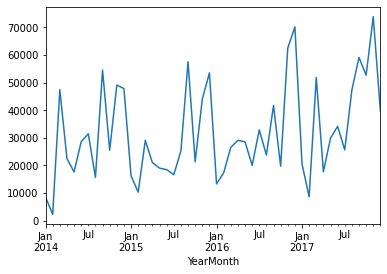

In [7]:
results['sales']['sum'].plot()

<AxesSubplot:xlabel='YearMonth'>

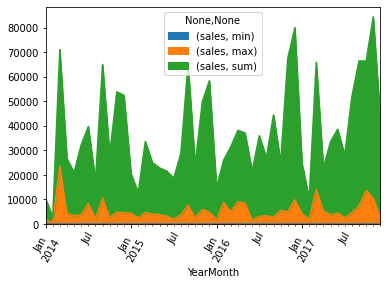

In [8]:
results[list(filter(lambda x: x != 'Sales', results.columns))]\
    .plot(kind='area', rot=60, stacked=True)

#### Сумма продаж также растёт.

<AxesSubplot:xlabel='order_date'>

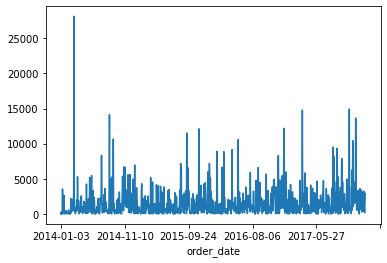

In [9]:
#продажи без группировки по месяцам
df.groupby('order_date')['sales'].sum().plot()

## 2. Как меняется средний чек?

In [10]:
results = df.groupby('YearMonth').agg({'sales': ['mean']})
results.reset_index().sort_values('YearMonth', ascending = False)
results = results.reset_index()
results.head()

,YearMonth,sales
,,mean
0,2014-01-01,352.316125
1,2014-02-01,112.277900
2,2014-03-01,846.864339
3,2014-04-01,449.054840
4,2014-05-01,319.910036


<AxesSubplot:>

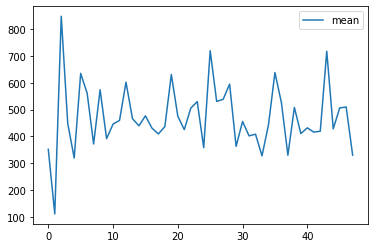

In [11]:
results['sales'].plot()

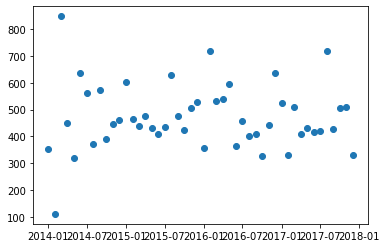

In [12]:
plt.scatter(results['YearMonth'], results['sales'])

In [13]:
results['YearMonth'] = results['YearMonth'].dt.year
results.rename(columns={'YearMonth': 'Year'}, inplace=True)

In [14]:
results_group = results.groupby('Year').mean()
results_group.head()

,sales
,mean
Year,
2014,459.976862
2015,485.672777
2016,481.595473
2017,461.166398


Средний чек в 2017 году был ниже, чем в 2016 и 2015, но выше, чем в 2014. 

## 3. Какие товарные категории принесли больше всего выручки?

In [15]:
#сделал новый запрос SQL, который содержит более правильную таблицу, но в коде выше её не меняю для экономии времени
df2 = pd.read_csv('orders2.csv')
df2.head()


,order_date,sales,amount,category
0,2016-11-08,993.9000,261.9600,Furniture
1,2016-11-08,993.9000,731.9400,Furniture
2,2016-06-12,14.6200,14.6200,Office Supplies
3,2015-10-11,979.9455,957.5775,Furniture
4,2015-10-11,979.9455,22.3680,Office Supplies


In [16]:
# df2['order_date'] = pd.to_datetime(df2['order_date'])

In [17]:
# df2['order_date'] = df2['order_date'].dt.year

In [18]:
pd.options.display.float_format = '{:,.1f}'.format
df2.groupby('category').sum()

,sales,amount
category,,
Furniture,"1,753,768.4","741,432.0"
Office Supplies,"3,587,969.2","718,317.8"
Technology,"1,761,350.2","835,759.7"


Больше всего выручки принесла категория Office Supplies: 3 587 969.

## Объясните динамику продаж в последние 3 месяца. Какие факторы сильнее всего повлияли на выручку?

<AxesSubplot:>

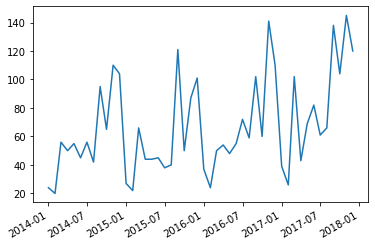

In [19]:
res.plot()

Как я говорил выше (в ячейке 5), последние 3 месяца + 1 являются топовыми месяцами. 

Office Supplies (канцелярия?) является сопуствующим атрибутом любого бизнеса. А "высокий сезон" в бизнесе начинается осенью, после отпусков, и перед Новым Годом.

Помимо этого, я думаю, оказывает влияние Рождество (этот датасет ведь американский, насколько я могу судить из таблицы "customers"), ведь скорее всего в США тоже есть нерабочие дни, и чтобы не остаться без канцелярских расходников в праздники, повышаются заказы в ноябре. 
